In [0]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import *
from keras import optimizers
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras import regularizers
from sklearn.model_selection import GridSearchCV
import os


In [0]:
num_classes = 3


In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('x_train type:', x_train.dtype)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
x_train type: uint8
50000 train samples
10000 test samples


In [0]:
# Select three classes

def get_class_i(x, y, i1,i2,i3):
    # Locate position of labels that equal to i1, i2 or i3
    pos_i = np.argwhere((y == i1) | (y == i2) | (y == i3))
    # Convert the result into a 1-D list
    pos_i = list(pos_i[:,0])
    # Collect all data that match the desired label
    x_i = np.array([x[j] for j in pos_i])
    y_i = np.array([y[k] for k in pos_i])

    return x_i,y_i

In [5]:
x_train_3,y_train_3 = get_class_i(x_train,y_train,0,1,2)
x_test_3,y_test_3 = get_class_i(x_test,y_test,0,1,2)
y_train_3.shape

(15000, 1)

In [0]:
# Convert class vectors to binary class matrices.
y_train_3 = np_utils.to_categorical(y_train_3, num_classes)
y_test_3 = np_utils.to_categorical(y_test_3, num_classes)
x_train_3 = x_train_3.astype('float32')
x_test_3 = x_test_3.astype('float32')
x_train_3  /= 255
x_test_3 /= 255

In [0]:
# Function to select number of epochs and batch size
def create_model():
  # create model
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(1024,input_shape=(32,32,3),activation='relu')) 
  model.add(Dense(512,activation='relu'))
  model.add(Dense(256,activation='relu')) 
  model.add(Dense(128,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
# fix random seed for reproducibility
seed = 5
# create model
model = KerasClassifier(build_fn=create_model, verbose=-1)
# define the grid search parameters
batch_size = [40,50,80,100]
epochs = [25,50,100,150]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train_3, y_train_3)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
# Grid search for selecting the optimizer
def create_model2(optimizer='adam'):
  # create model
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(512,input_shape=(32,32,3),activation='relu'))
  model.add(Dense(256,activation='relu'))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

# create model
model = KerasClassifier(build_fn=create_model2, epochs=100, batch_size=300, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train_3, y_train_3)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
#grid search for optimizer hyperparameters

def create_model3(learn_rate=0.01, beta_1=0.9, beta_2=0.999,amsgrad=False):
  # create model
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(512,input_shape=(32,32,3),activation='relu'))
  model.add(Dense(256,activation='relu'))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  # Compile model
  
  optimizer = Adam(lr=learn_rate, beta_1=beta_1, beta_2=beta_2, amsgrad=amsgrad)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

# create model
model = KerasClassifier(build_fn=create_model3, epochs=100, batch_size=500, verbose=0)
# define the grid search parameters
learn_rate = [0.01,0.001,0.005, 0.0001]
#beta_1 = [0.6, 0.8, 0.9]
#beta_2 = [0.98, 0.99, 0.995, 0.999]
#amsgrad = [True,False]
param_grid = dict(learn_rate=learn_rate) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train_3, y_train_3)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/50
15000/15000 [==============================] - 2s 159us/step - loss: 7.1470 - acc: 0.6593
Epoch 2/50
15000/15000 [==============================] - 1s 91us/step - loss: 4.6420 - acc: 0.7217
Epoch 3/50
15000/15000 [==============================] - 1s 89us/step - loss: 3.1082 - acc: 0.7385
Epoch 4/50
15000/15000 [==============================] - 1s 92us/step - loss: 2.3876 - acc: 0.7468
Epoch 5/50
15000/15000 [==============================] - 1s 89us/step - loss: 1.9971 - acc: 0.7615
Epoch 6/50
15000/15000 [==============================] - 1s 89us/step - loss: 1.7457 - acc: 0.7709
Epoch 7/50
15000/15000 [==============================] - 1s 90us/step - loss: 1.5523 - acc: 0.7793
Epoch 8/50
15000/15000 [==============================] - 1s 92us/step - loss: 1.4027 - acc: 0.7865
Epoch 9/50
15000/15000 [==============================] - 1s 92us/step - loss: 1.2886 - acc: 0.7911
Epoch 10/50
15000/15000 [==============================] - 1s 92us/step - loss: 1.1940 - acc: 0.795

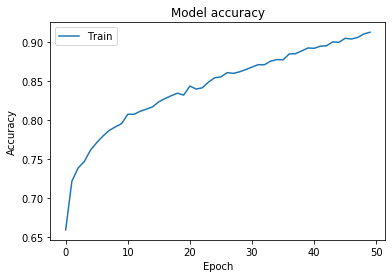

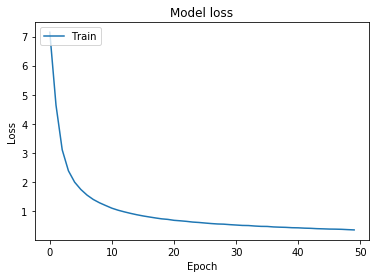

In [39]:
# Train model
batch_size = 50
epochs = 50

model = Sequential()
model.add(Flatten())
model.add(Dense(512,input_shape=(32,32,3),activation='relu'))
model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(num_classes,activation='softmax'))

optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.99, amsgrad=False)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(x_train_3, y_train_3, batch_size=batch_size, epochs=epochs, shuffle=True)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [40]:
score = model.evaluate(x_test_3, y_test_3, verbose=1)

3000/3000 [==============================] - 0s 163us/step


In [45]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 81.93%


In [42]:
# save model
model.save("task1model.h5")
print("Saved model to disk")

Saved model to disk


In [44]:

# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
# load model
model = load_model('task1model.h5')
# summarize model.
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_54 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_55 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_56 (Dense)             (None, 3)                 387       
Total params: 1,737,987
Trainable params: 1,737,987
Non-trainable params: 0
_________________________________________________________________
